# Introduction

Muhammad Ryo Tjokrosoedomo<br>
FTDS Batch 10

Informasi dataset

- CustomerID: A unique ID that identifies each customer
- Gender: The customer’s gender (Male, Female)
- Senior Citizen: Indicates if the customer is 65 or older (Yes = 1, No = 0)
- Partner: Indicates if the customer has partner or not (Yes, No)
- Dependents: Indicates if the customer lives with any dependents (Yes, No)
- Tenure: Indicates the total amount of months that the customer has been with the company (Months)
- Phone Service: Indicates if the customer subscribes to home phone service with the company (Yes, No)
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No, No Phone Service)
- Internet Service: Indicates if the customer subscribes to Internet service with the company (No, DSL, Fiber Optic)
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No, No Internet Service)
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No, No Internet Service)
- Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No, No Internet Service)
- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No, No Internet Service)
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, No Internet Service)
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, No Internet Service)
- Contract: Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
- Paperless Billing: Indicates if the customer has chosen paperless billing (Yes, No)
- Payment Method: Indicates how the customer pays their bill (Electronic Check, Bank transfer (automatic), Credit card (automatic), Mailed Check)
- Monthly Charge: Indicates the customer’s monthly charge (USD)
- Total Charges: Indicates the customer’s total charges (USD)
- Churn: Indicates whether the customer churned or not (Yes, No)




Objective: Membuat model neural network untuk memprediksi apakah pelanggan akan churn atau tidak

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

# Data Loading

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Mengecek target pada dataset

In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Rasio target dapat dianggap imbalance dengan rasio Yes:No = 27:73

Pengecekan missing value dan tipe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Hanya terdapat dua fitur numerik, dan tidak terdapat missing value
- Fitur TotalCharges seharusnya berupa data numerik, tetapi memiliki tipe data object

Pengecekan lebih lanjut pada fitur TotalCharges

In [5]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Terdapat 11 baris TotalCharges yang berisi " "

In [7]:
df["TotalCharges"].replace(" ", np.nan, inplace=True)

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- tenure dan MonthlyCharges memiliki range yang cukup besar
- Keduanya bersifat skewed

# Exploratory Data Analysis

Mengubah label target menjadi 0 dan 1

In [11]:
df["Churn"].replace({"Yes":1,"No":0}, inplace=True)

## Mengecek hubungan data kategorik terhadap target menggunakan countplot dan pie chart

Fitur Gender

In [12]:
male = df[df["gender"] == "Male"]
female = df[df["gender"] == "Female"]

In [13]:
df_male = male.groupby("Churn").count()
df_female = female.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n female - churn')

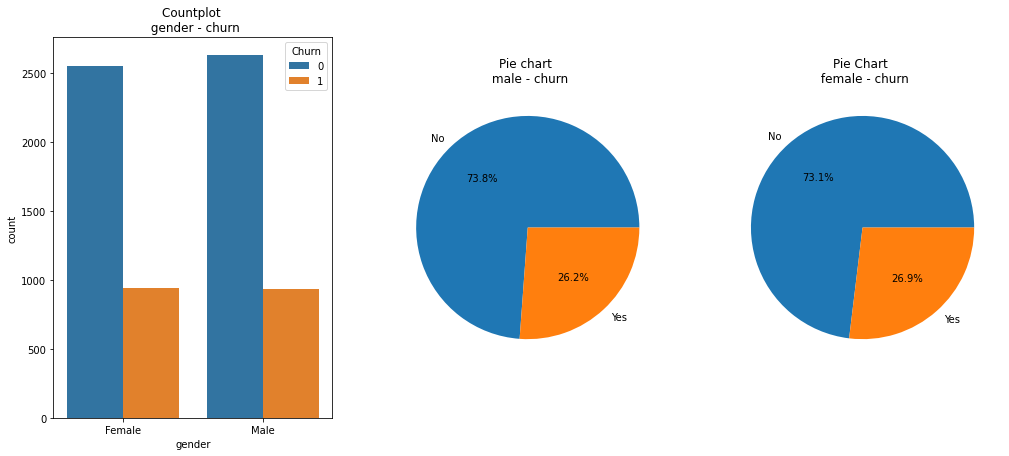

In [14]:
plt.figure(figsize=(17, 7))

plt.subplot(131)
sns.countplot(df["gender"], hue=df["Churn"])
plt.title('Countplot \n gender - churn')

plt.subplot(132)
plt.pie(df_male["gender"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n male - churn')

plt.subplot(133)
plt.pie(df_female["gender"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n female - churn')

Fitur gender male dan female memiliki rasio churn yang sama, kemungkinan besar tidak ada pengaruh gender dengan churn rate

Fitur Senior Citizen

In [15]:
senior = df[df["SeniorCitizen"] == 1]
non_senior = df[df["SeniorCitizen"] == 0]

In [16]:
df_senior = senior.groupby("Churn").count()
df_non_senior = non_senior.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n non senior - churn')

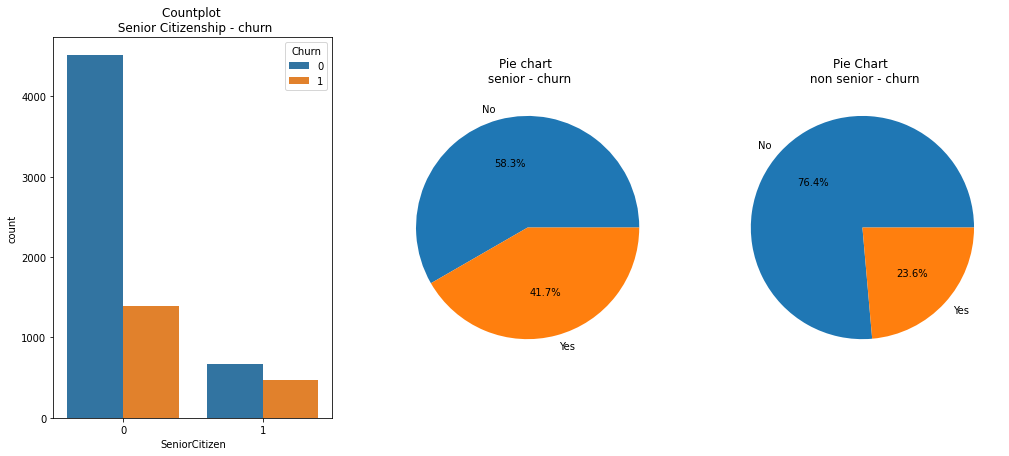

In [17]:
plt.figure(figsize=(17, 7))

plt.subplot(131)
sns.countplot(df["SeniorCitizen"], hue=df["Churn"])
plt.title('Countplot \n Senior Citizenship - churn')

plt.subplot(132)
plt.pie(df_senior["SeniorCitizen"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n senior - churn')

plt.subplot(133)
plt.pie(df_non_senior["SeniorCitizen"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n non senior - churn')

Pelanggan yang bukan lansia memiliki churn rasio yang lebih tinggi dari pelanggan lansia, namun jumlahnya yang jauh lebih sedikit tidak dapat menggambarkan secara utuh hubungan senior citizenship dengan churn rate

Fitur Partner

In [18]:
y_partner = df[df["Partner"] == "Yes"]
n_partner = df[df["Partner"] == "No"]

In [19]:
df_yp = y_partner.groupby("Churn").count()
df_np = n_partner.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n no partner - churn')

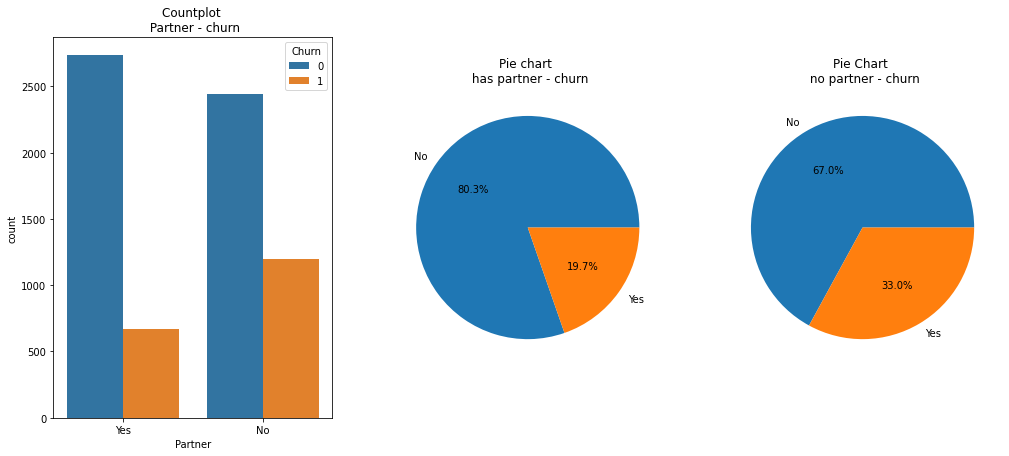

In [20]:
plt.figure(figsize=(17, 7))

plt.subplot(131)
sns.countplot(df["Partner"], hue=df["Churn"])
plt.title('Countplot \n Partner - churn')

plt.subplot(132)
plt.pie(df_yp["Partner"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has partner - churn')

plt.subplot(133)
plt.pie(df_np["Partner"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no partner - churn')

Pelanggan yang tidak memiliki partner memiliki churn rasio yang lebih kecil dari pelanggan yang memiliki partner, kemungkinan besar fitur partner memiliki dampak terhadap churn rate

Fitur Dependents

In [21]:
y_dependents = df[df["Dependents"] == "Yes"]
n_dependents = df[df["Dependents"] == "No"]

In [22]:
df_yd = y_dependents.groupby("Churn").count()
df_nd = n_dependents.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n no dependents - churn')

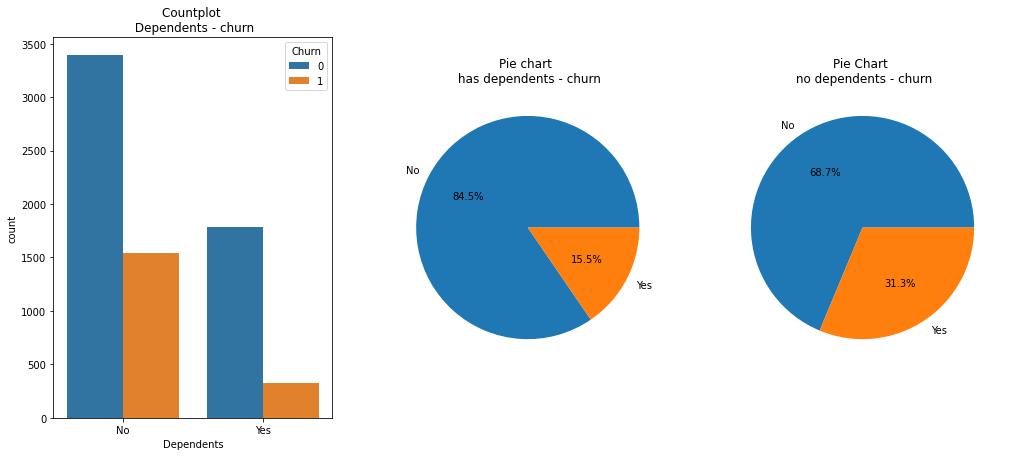

In [23]:
plt.figure(figsize=(17, 7))

plt.subplot(131)
sns.countplot(df["Dependents"], hue=df["Churn"])
plt.title('Countplot \n Dependents - churn')

plt.subplot(132)
plt.pie(df_yd["Dependents"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has dependents - churn')

plt.subplot(133)
plt.pie(df_nd["Dependents"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no dependents - churn')

Pelanggan yang tidak memiliki dependents memiliki churn rasio yang lebih kecil dari pelanggan yang memiliki dependents, namun jumlahnya yang jauh lebih sedikit tidak dapat menggambarkan secara utuh hubungan keberadaan dependents dengan churn rate

Fitur Phone Service

In [24]:
y_phone = df[df["PhoneService"] == "Yes"]
n_phone = df[df["PhoneService"] == "No"]

In [25]:
df_yph = y_phone.groupby("Churn").count()
df_nph = n_phone.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n no phone service - churn')

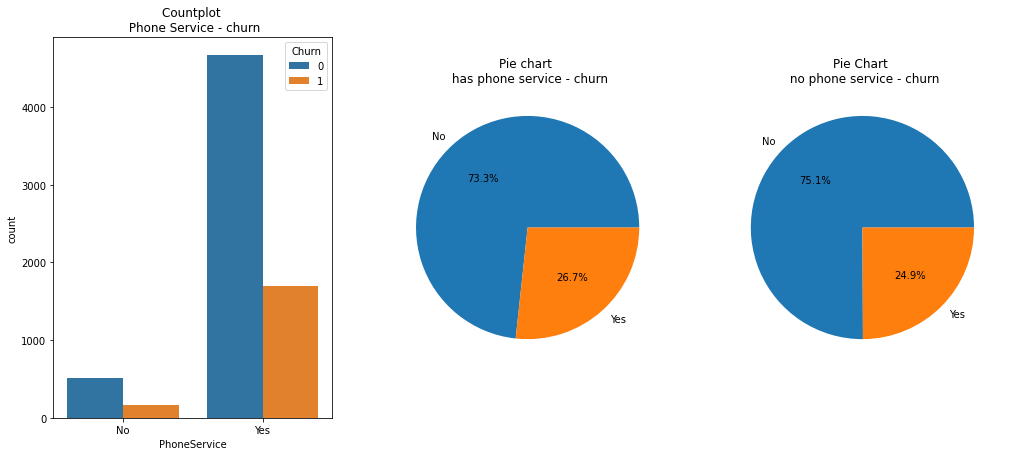

In [26]:
plt.figure(figsize=(17, 7))

plt.subplot(131)
sns.countplot(df["PhoneService"], hue=df["Churn"])
plt.title('Countplot \n Phone Service - churn')

plt.subplot(132)
plt.pie(df_yph["PhoneService"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has phone service - churn')

plt.subplot(133)
plt.pie(df_nph["PhoneService"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no phone service - churn')

Terdapat rasio churn yang sama pada pelanggan yang berlangganan telepon maupun tidak, namun jumlah pelanggan tidak berlangganan yang jauh lebih sedikit tidak dapat menggambarkan secara utuh hubungan keberadaan langganan telepon dengan churn rate

Fitur Multiple Lines

In [27]:
y_multi = df[df["MultipleLines"] == "Yes"]
n_multi = df[df["MultipleLines"] == "No"]
na_multi = df[df["MultipleLines"] == "No phone service"]

In [28]:
df_ym = y_multi.groupby("Churn").count()
df_nm = n_multi.groupby("Churn").count()
df_nam = na_multi.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without multiple lines (no phone service) - churn')

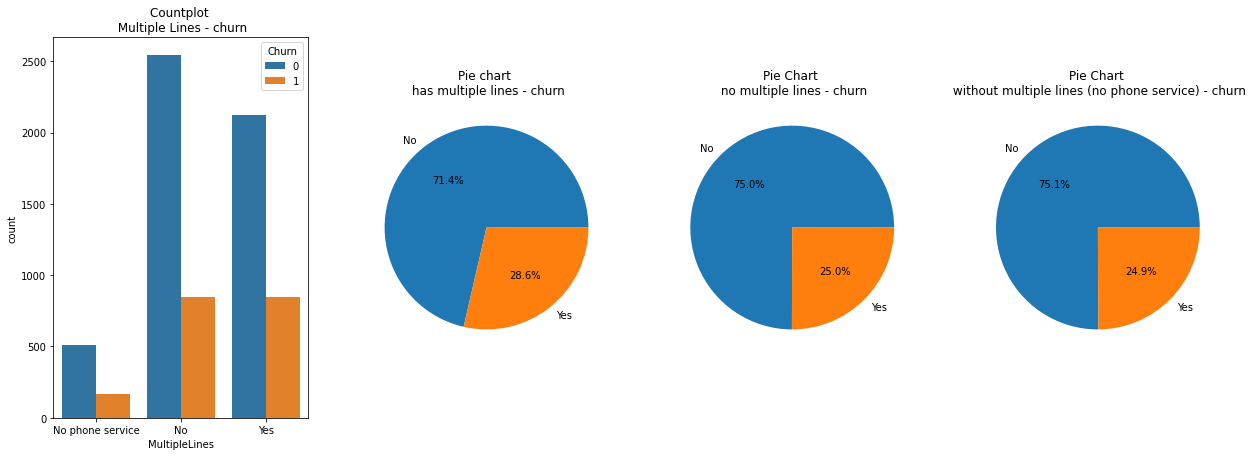

In [29]:
plt.figure(figsize=(21, 7))

plt.subplot(141)
sns.countplot(df["MultipleLines"], hue=df["Churn"])
plt.title('Countplot \n Multiple Lines - churn')

plt.subplot(142)
plt.pie(df_ym["MultipleLines"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has multiple lines - churn')

plt.subplot(143)
plt.pie(df_nm["MultipleLines"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no multiple lines - churn')

plt.subplot(144)
plt.pie(df_nam["MultipleLines"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without multiple lines (no phone service) - churn')

Terdapat rasio churn yang sama pada semua kategori multiple lines , namun perbedaan jumlah pelanggan yang cukup besar tidak dapat menggambarkan secara utuh hubungan keberadaan multiple lines dengan churn rate. Fitur ini juga berhubungan langsung dengan fitur phone service

Fitur Internet Service

In [30]:
dsl = df[df["InternetService"] == "DSL"]
fo = df[df["InternetService"] == "Fiber optic"]
n_int = df[df["InternetService"] == "No"]

In [31]:
df_dsl = dsl.groupby("Churn").count()
df_fo = fo.groupby("Churn").count()
df_int = n_int.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n no internet service - churn')

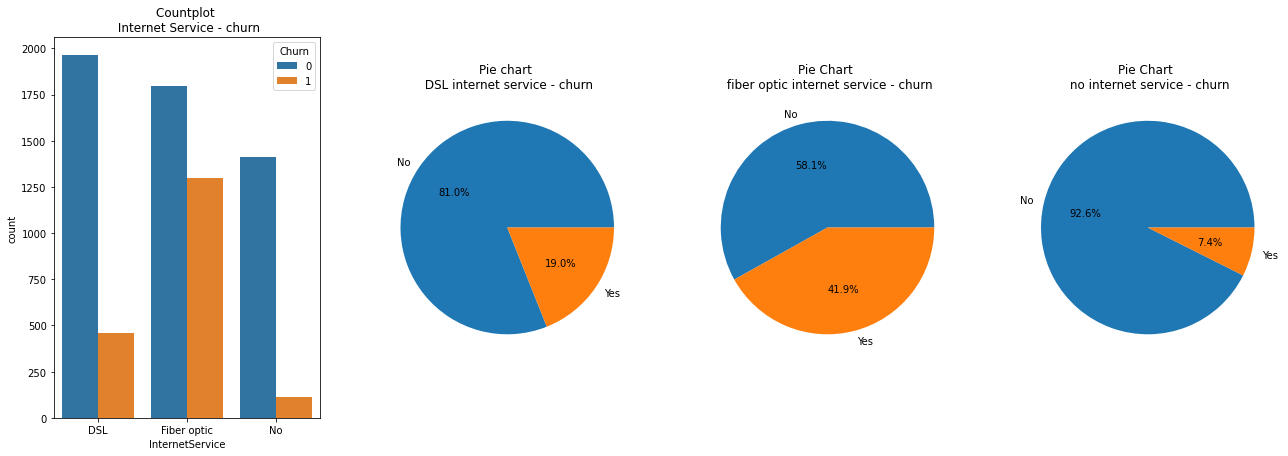

In [32]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["InternetService"], hue=df["Churn"])
plt.title('Countplot \n Internet Service - churn')

plt.subplot(142)
plt.pie(df_dsl["InternetService"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n DSL internet service - churn')

plt.subplot(143)
plt.pie(df_fo["InternetService"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n fiber optic internet service - churn')

plt.subplot(144)
plt.pie(df_int["InternetService"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no internet service - churn')

Terdapat perbedaan rasio churn pada kategori fitur internet service, kemungkinan besar ada hubungan antara fitur ini dengan churn rate

Fitur Online Security

In [33]:
y_os= df[df["OnlineSecurity"] == "Yes"]
n_os = df[df["OnlineSecurity"] == "No"]
na_os = df[df["OnlineSecurity"] == "No internet service"]

In [34]:
df_yos = y_os.groupby("Churn").count()
df_nos = n_os.groupby("Churn").count()
df_naos = na_os.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without online security (no internet service) - churn')

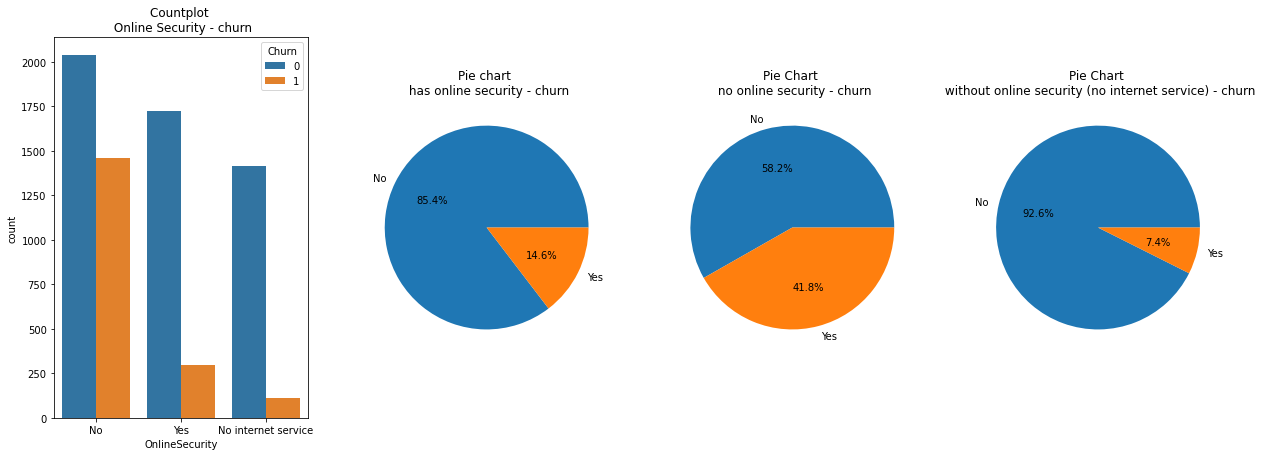

In [35]:
plt.figure(figsize=(21, 7))

plt.subplot(141)
sns.countplot(df["OnlineSecurity"], hue=df["Churn"])
plt.title('Countplot \n Online Security - churn')

plt.subplot(142)
plt.pie(df_yos["OnlineSecurity"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has online security - churn')

plt.subplot(143)
plt.pie(df_nos["OnlineSecurity"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no online security - churn')

plt.subplot(144)
plt.pie(df_naos["OnlineSecurity"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without online security (no internet service) - churn')

Terdapat perbedaan rasio churn pada kategori fitur online security, kemungkinan besar ada hubungan antara fitur ini dengan churn rate. Fitur ini berhubungan langsung dengan fitur internet service, dapat dilihat dari rasio churn yang sama pada kategori without online security (no internet service)

Fitur Online Backup

In [36]:
y_ob= df[df["OnlineBackup"] == "Yes"]
n_ob = df[df["OnlineBackup"] == "No"]
na_ob = df[df["OnlineBackup"] == "No internet service"]

In [37]:
df_yob = y_ob.groupby("Churn").count()
df_nob = n_ob.groupby("Churn").count()
df_naob = na_ob.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without online backup (no internet service) - churn')

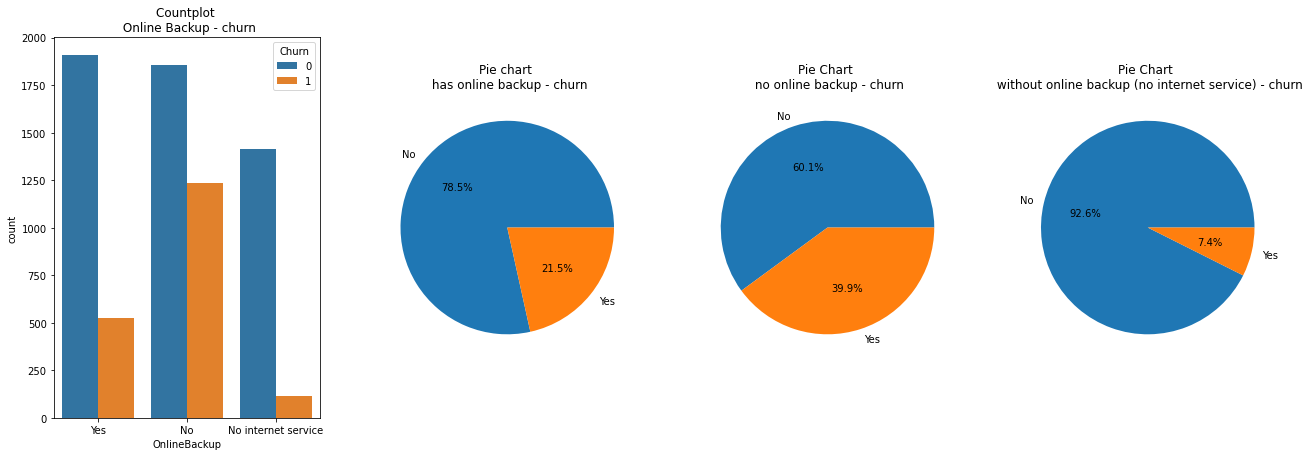

In [38]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["OnlineBackup"], hue=df["Churn"])
plt.title('Countplot \n Online Backup - churn')

plt.subplot(142)
plt.pie(df_yob["OnlineBackup"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has online backup - churn')

plt.subplot(143)
plt.pie(df_nob["OnlineBackup"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no online backup - churn')

plt.subplot(144)
plt.pie(df_naob["OnlineBackup"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without online backup (no internet service) - churn')

Terdapat perbedaan rasio churn pada kategori fitur online backup, kemungkinan besar ada hubungan antara fitur ini dengan churn rate. Fitur ini berhubungan langsung dengan fitur internet service, dapat dilihat dari rasio churn yang sama pada kategori without online backup (no internet service)

Fitur Device Protection

In [39]:
y_dp = df[df["DeviceProtection"] == "Yes"]
n_dp = df[df["DeviceProtection"] == "No"]
na_dp = df[df["DeviceProtection"] == "No internet service"]

In [40]:
df_ydp = y_dp.groupby("Churn").count()
df_ndp = n_dp.groupby("Churn").count()
df_nadp = na_dp.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without device protection (no internet service) - churn')

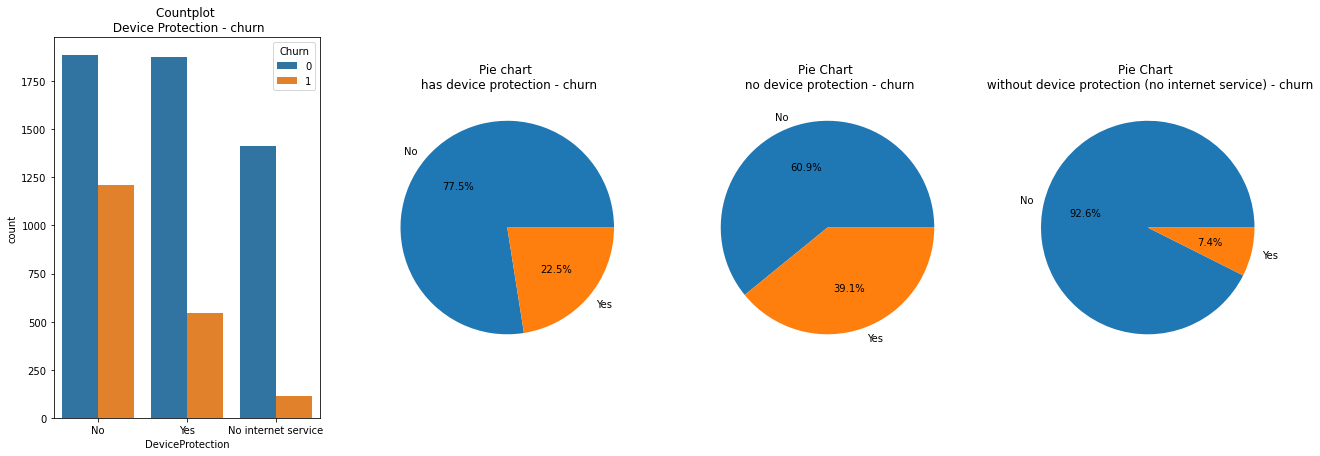

In [41]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["DeviceProtection"], hue=df["Churn"])
plt.title('Countplot \n Device Protection - churn')

plt.subplot(142)
plt.pie(df_ydp["DeviceProtection"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has device protection - churn')

plt.subplot(143)
plt.pie(df_ndp["DeviceProtection"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no device protection - churn')

plt.subplot(144)
plt.pie(df_nadp["DeviceProtection"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without device protection (no internet service) - churn')

Terdapat perbedaan rasio churn pada kategori fitur device protection, kemungkinan besar ada hubungan antara fitur ini dengan churn rate. Fitur ini berhubungan langsung dengan fitur internet service, dapat dilihat dari rasio churn yang sama pada kategori without device protection (no internet service)

Fitur Tech Support

In [42]:
y_ts = df[df["TechSupport"] == "Yes"]
n_ts = df[df["TechSupport"] == "No"]
na_ts = df[df["TechSupport"] == "No internet service"]

In [43]:
df_yts = y_ts.groupby("Churn").count()
df_nts = n_ts.groupby("Churn").count()
df_nats = na_ts.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without tech support (no internet service) - churn')

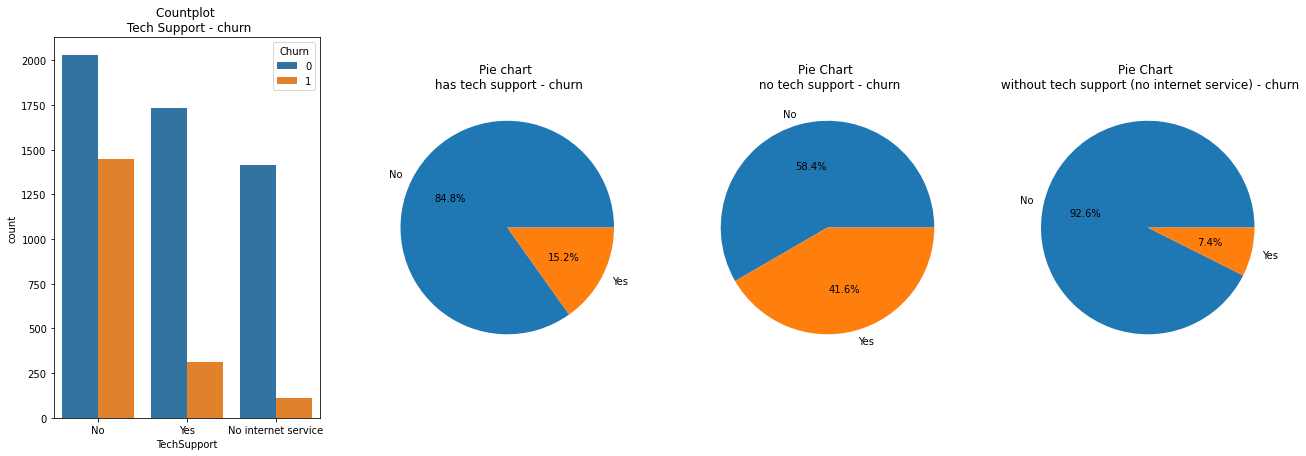

In [44]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["TechSupport"], hue=df["Churn"])
plt.title('Countplot \n Tech Support - churn')

plt.subplot(142)
plt.pie(df_yts["TechSupport"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has tech support - churn')

plt.subplot(143)
plt.pie(df_nts["TechSupport"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no tech support - churn')

plt.subplot(144)
plt.pie(df_nats["TechSupport"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without tech support (no internet service) - churn')

Terdapat perbedaan rasio churn pada kategori fitur tech support, kemungkinan besar ada hubungan antara fitur ini dengan churn rate. Fitur ini berhubungan langsung dengan fitur internet service, dapat dilihat dari rasio churn yang sama pada kategori without tech support (no internet service)

Fitur Streaming TV

In [45]:
y_stv = df[df["StreamingTV"] == "Yes"]
n_stv = df[df["StreamingTV"] == "No"]
na_stv = df[df["StreamingTV"] == "No internet service"]

In [46]:
df_ystv = y_stv.groupby("Churn").count()
df_nstv = n_stv.groupby("Churn").count()
df_nastv = na_stv.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without streaming tv (no internet service) - churn')

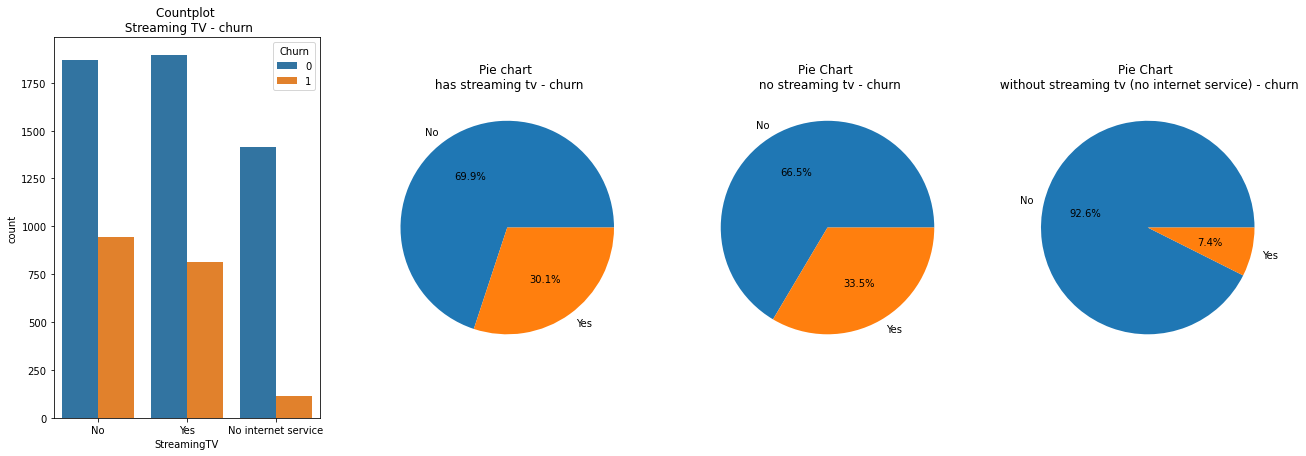

In [47]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["StreamingTV"], hue=df["Churn"])
plt.title('Countplot \n Streaming TV - churn')

plt.subplot(142)
plt.pie(df_ystv["StreamingTV"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has streaming tv - churn')

plt.subplot(143)
plt.pie(df_nstv["StreamingTV"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no streaming tv - churn')

plt.subplot(144)
plt.pie(df_nastv["StreamingTV"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without streaming tv (no internet service) - churn')

Rasio churn pada kategori fitur streaming tv hampir sama, namun karena fitur ini berhubungan langsung dengan fitur internet service, terdapat rasio churn tinggi pada kategori without streaming tv. Hal ini belum tentu bisa menggambarkan hubungan fitur ini terhadap churn rate

Fitur Streaming Movies

In [48]:
y_sm = df[df["StreamingMovies"] == "Yes"]
n_sm = df[df["StreamingMovies"] == "No"]
na_sm = df[df["StreamingMovies"] == "No internet service"]

In [49]:
df_ysm = y_sm.groupby("Churn").count()
df_nsm = n_sm.groupby("Churn").count()
df_nasm = na_sm.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n without streaming movies (no internet service) - churn')

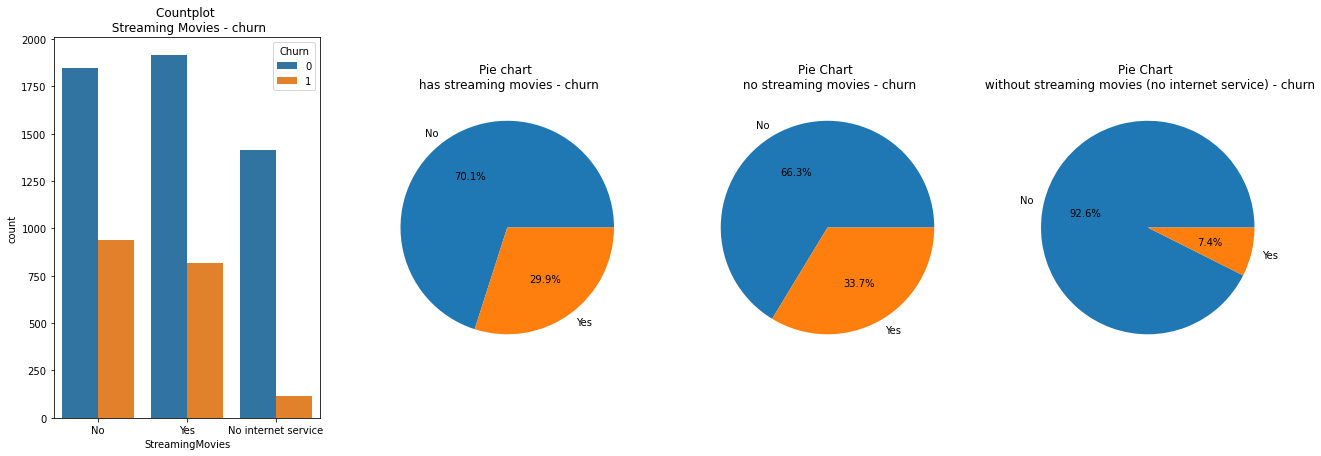

In [50]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["StreamingMovies"], hue=df["Churn"])
plt.title('Countplot \n Streaming Movies - churn')

plt.subplot(142)
plt.pie(df_ysm["StreamingMovies"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has streaming movies - churn')

plt.subplot(143)
plt.pie(df_nsm["StreamingMovies"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no streaming movies - churn')

plt.subplot(144)
plt.pie(df_nasm["StreamingMovies"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n without streaming movies (no internet service) - churn')

Rasio churn pada kategori fitur streaming movies hampir sama, namun karena fitur ini berhubungan langsung dengan fitur internet service, terdapat rasio churn tinggi pada kategori without streaming movies. Hal ini belum tentu bisa menggambarkan hubungan fitur ini terhadap churn rate

Fitur Contract

In [51]:
mtm = df[df["Contract"] == "Month-to-month"]
one_y = df[df["Contract"] == "One year"]
two_y = df[df["Contract"] == "Two year"]

In [52]:
df_mtm = mtm.groupby("Churn").count()
df_one_y = one_y.groupby("Churn").count()
df_two_y = two_y.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n two year - churn')

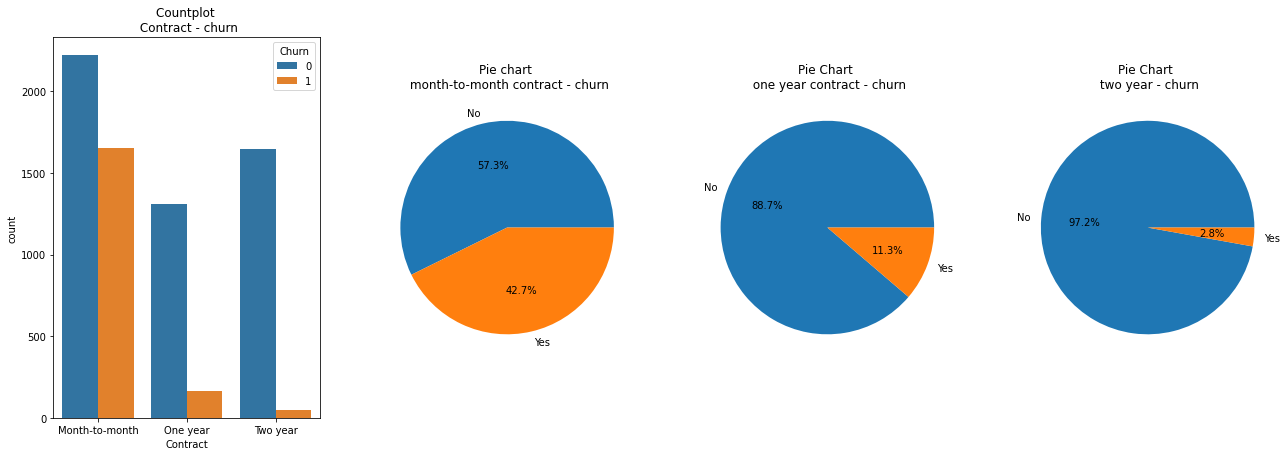

In [53]:
plt.figure(figsize=(22, 7))

plt.subplot(141)
sns.countplot(df["Contract"], hue=df["Churn"])
plt.title('Countplot \n Contract - churn')

plt.subplot(142)
plt.pie(df_mtm["Contract"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n month-to-month contract - churn')

plt.subplot(143)
plt.pie(df_one_y["Contract"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n one year contract - churn')

plt.subplot(144)
plt.pie(df_two_y["Contract"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n two year - churn')

Perbedaan rasio churn pada setiap kategori fitur contract cukup besar. Dapat disimpulkan hubungan antara fitur contract dengan churn rate cukup besar

Fitur Paperless Billing

In [54]:
y_pb = df[df["PaperlessBilling"] == "Yes"]
n_pb = df[df["PaperlessBilling"] == "No"]

In [55]:
df_ypb = y_pb.groupby("Churn").count()
df_npb = n_pb.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n no paperless billing - churn')

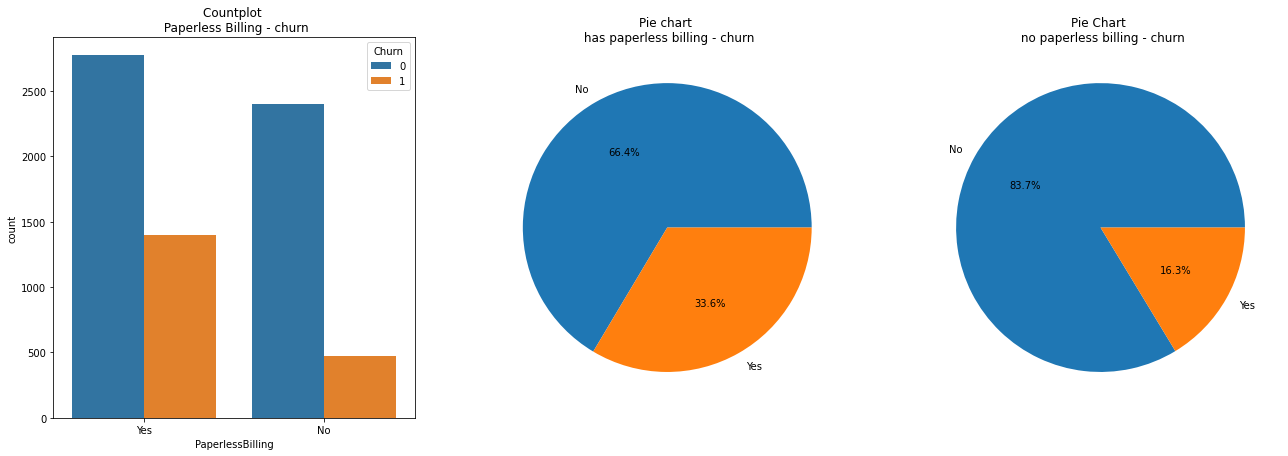

In [56]:
plt.figure(figsize=(22, 7))

plt.subplot(131)
sns.countplot(df["PaperlessBilling"], hue=df["Churn"])
plt.title('Countplot \n Paperless Billing - churn')

plt.subplot(132)
plt.pie(df_ypb["PaperlessBilling"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n has paperless billing - churn')

plt.subplot(133)
plt.pie(df_npb["PaperlessBilling"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n no paperless billing - churn')

Kategori no paperless billing memiliki rasio churn yang lebih besar dari pelanggan dengan paperless billing, kemungkinan ada hubungan antara fitur ini terhadap churn rate

Fitur Payment Method

In [57]:
ec = df[df["PaymentMethod"] == "Electronic check"]
mc = df[df["PaymentMethod"] == "Mailed check"]
bc = df[df["PaymentMethod"] == "Bank transfer (automatic)"]
cc = df[df["PaymentMethod"] == "Credit card (automatic)"]

In [58]:
df_ec = ec.groupby("Churn").count()
df_mc = mc.groupby("Churn").count()
df_bc = bc.groupby("Churn").count()
df_cc = cc.groupby("Churn").count()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pie Chart \n credit card (automatic) - churn')

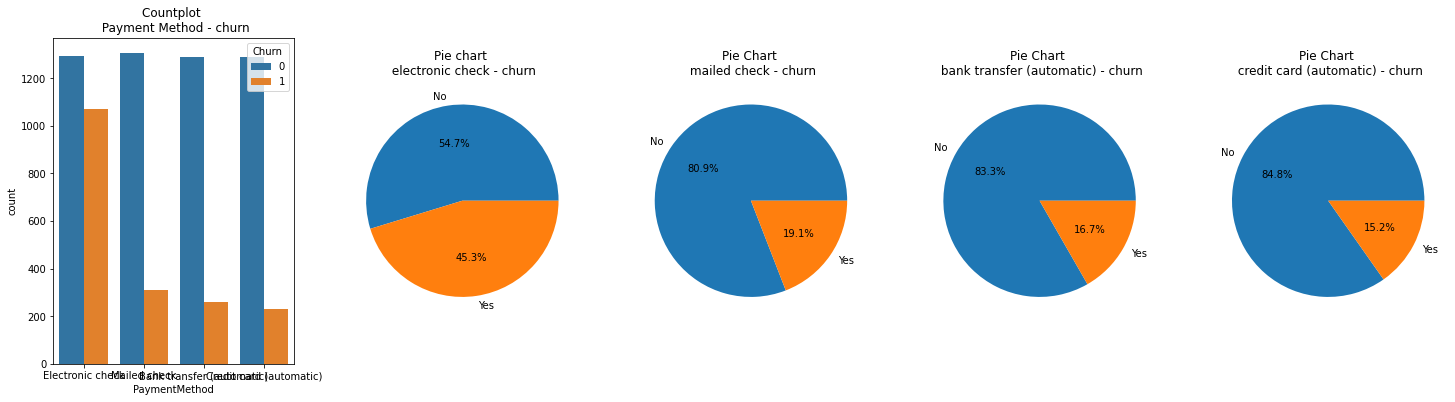

In [59]:
plt.figure(figsize=(25, 6))

plt.subplot(151)
sns.countplot(df["PaymentMethod"], hue=df["Churn"])
plt.title('Countplot \n Payment Method - churn')

plt.subplot(152)
plt.pie(df_ec["PaymentMethod"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie chart \n electronic check - churn')

plt.subplot(153)
plt.pie(df_mc["PaymentMethod"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n mailed check - churn')

plt.subplot(154)
plt.pie(df_bc["PaymentMethod"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n bank transfer (automatic) - churn')

plt.subplot(155)
plt.pie(df_cc["PaymentMethod"], autopct='%1.1f%%', labels=["No", "Yes"])
plt.title('Pie Chart \n credit card (automatic) - churn')

Terdapat satu kategori, yaitu electronic check, yang berbeda sendiri dari yang lain. Keberadaan hal tersebut menunjukkan adanya hubungan antara fitu ini dengan churn rate

## Mengecek distribusi data numerik

In [60]:
df_churn_1 = df[df["Churn"] == 1]
df_churn_0 = df[df["Churn"] == 0]

Fitur tenure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibi

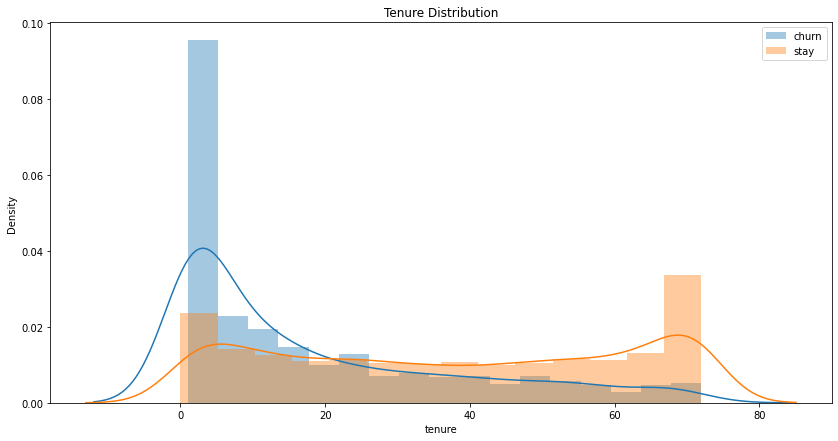

In [61]:
plt.figure(figsize=(14, 7))

plt.subplot()
sns.distplot(df_churn_1["tenure"], label="churn")

plt.subplot()
sns.distplot(df_churn_0["tenure"], label="stay")

plt.title("Tenure Distribution")
plt.legend()

Dari grafik tersebut terlihat hubungan antara churn rate dengan tenure pelanggan. Dimana churn rate meningkat pada jumlah tenure sedikit (~0 - 20 bulan). Sementara di atas 20 bulan berangsur-angsur churn rate menurun

Fitur Monthly Charges

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibi

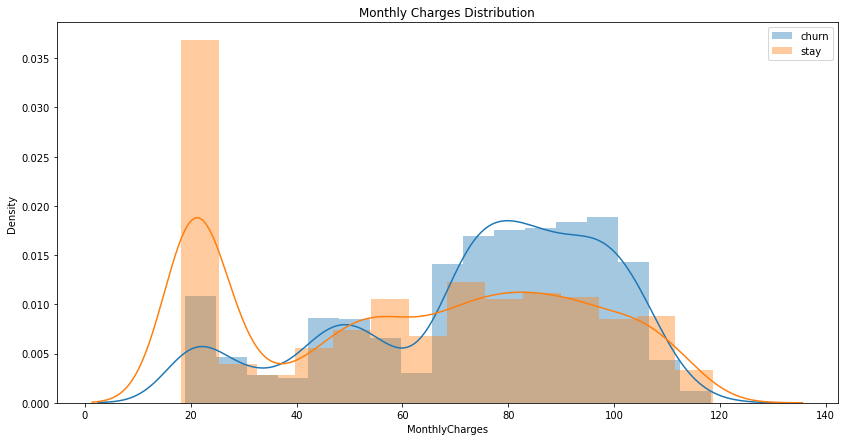

In [62]:
plt.figure(figsize=(14, 7))

plt.subplot()
sns.distplot(df_churn_1["MonthlyCharges"], label="churn")

plt.subplot()
sns.distplot(df_churn_0["MonthlyCharges"], label="stay")

plt.title("Monthly Charges Distribution")
plt.legend()

Dari grafik tersebut terlihat hubungan antara churn rate dengan tagihan bulanan pelanggan. Pada tagihan rendah, di bawah USD 38, pelanggan cenderung akan stay. Pelanggan yang pergi menjadi lebih banyak di mulai pada tagihan bulanan di atas USD 65.

Fitur Total Charges

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibi

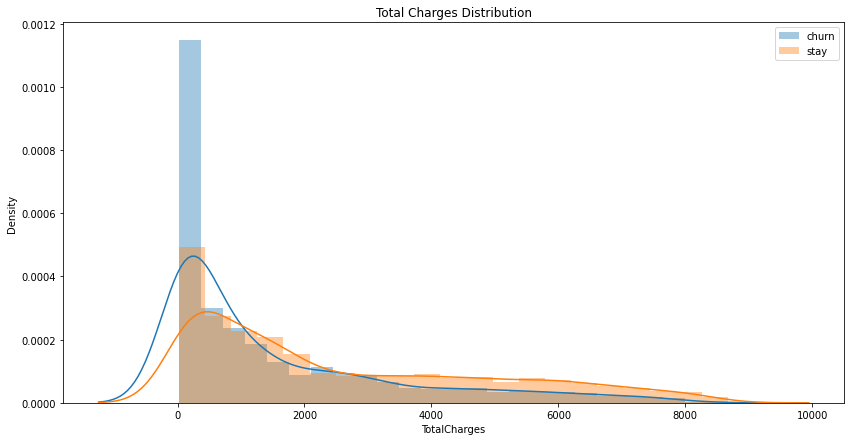

In [63]:
plt.figure(figsize=(14, 7))

plt.subplot()
sns.distplot(df_churn_1["TotalCharges"], label="churn")

plt.subplot()
sns.distplot(df_churn_0["TotalCharges"], label="stay")

plt.title("Total Charges Distribution")
plt.legend()

Fitur total charges adalah hasil kali fitur tenure dengan monthly charges. Maka dengan grafik yang menunjukkan kecenderungan pelanggan pergi di dekat nilai 0, yang artinya mirip dengan grafik tenure. Berarti fitur tenure lebih berpengaruh dibandingkan fitur tagihan bulanan

# Data Preprocessing

Mengubah label fitur SeniorCitizen agar sama dengan fitur kategorik (Yes, No)

In [64]:
df["SeniorCitizen"].replace({0:"No",1:"Yes"}, inplace=True)

Membuat sampel untuk data inference

In [65]:
inf = df.sample(15, random_state=12)

train-val-test split

In [66]:
X = df.drop(["customerID", "Churn"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=66)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=66)

Pengecekan Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


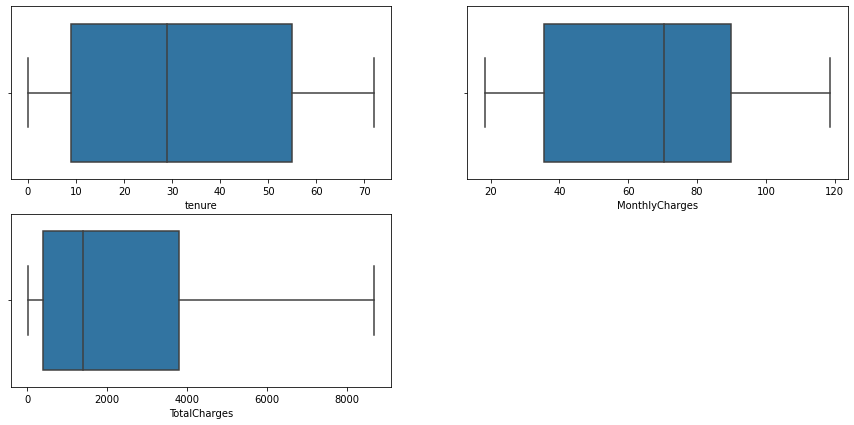

In [67]:
plt.subplots(figsize=(15,7))

plt.subplot(221)
sns.boxplot(df["tenure"])

plt.subplot(222)
sns.boxplot(df["MonthlyCharges"])

plt.subplot(223)
sns.boxplot(df["TotalCharges"])

Tidak ada outlier

In [68]:
cat_col = X_train.select_dtypes(include=['O']).columns.tolist()
num_col = X_train.select_dtypes(exclude=['O']).columns.tolist()

Mengecek korelasi fitur numerik menggunakan pearson correlation

In [69]:
X_train[num_col].corrwith(y_train)

tenure           -0.350539
MonthlyCharges    0.193580
TotalCharges     -0.201098
dtype: float64

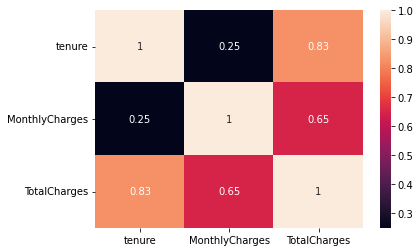

In [70]:
sns.heatmap(X_train[num_col].corr(), annot=True)

- Fitur TotalCharges memiliki korelasi tinggi terhadap fitur lain, maka akan didrop
- Fitur tenure yang memiliki korelasi > 0.2 terhadap target yang akan digunakan pada model

Mengecek korelasi fitur kategorik menggunakan chi2 dan mutual information

In [71]:
X_train_cat = X_train[cat_col]

In [72]:
ord_coder = OrdinalEncoder()
ord_coder.fit(X_train_cat)

X_train_cat_cod = ord_coder.transform(X_train_cat)

In [73]:
select_chi = SelectKBest(score_func=chi2, k="all")
select_mut = SelectKBest(score_func=mutual_info_classif, k="all")

select_chi.fit(X_train_cat_cod, y_train)
select_mut.fit(X_train_cat_cod, y_train)

chi_train = select_chi.transform(X_train_cat_cod)
mut_train = select_mut.transform(X_train_cat_cod)

In [74]:
chi_score = select_chi.scores_
chi_idx = select_chi.get_support(indices=True)

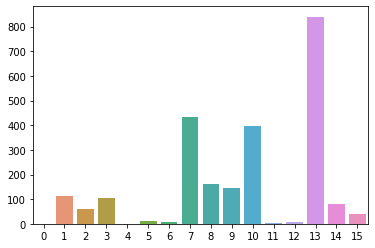

In [75]:
sns.barplot(x=chi_idx, y=chi_score)

In [76]:
mut_score = select_mut.scores_
mut_idx = select_mut.get_support(indices=True)

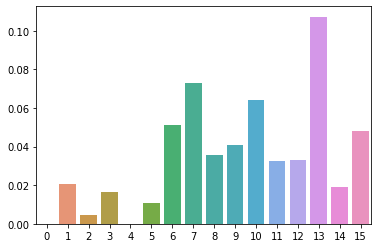

In [77]:
sns.barplot(x=mut_idx, y=mut_score)

Dari kedua metode tersebut maka fitur InternetService, OnlineSecurity, TechSupport, dan Contract yang akan digunakan dalam model

In [78]:
X_train_final = X_train[["tenure", "InternetService", "OnlineSecurity", "TechSupport", "Contract"]]
X_val_final = X_val[["tenure", "InternetService", "OnlineSecurity", "TechSupport", "Contract"]]
X_test_final = X_test[["tenure", "InternetService", "OnlineSecurity", "TechSupport", "Contract"]]

In [79]:
tenure_train = X_train_final[["tenure"]]
tenure_test = X_test_final[["tenure"]]

tenure_train.reset_index(drop=True,inplace=True)
tenure_test.reset_index(drop=True,inplace=True)

Membuat column transformer dengan standard scaler, one hot encoder, dan ordinal encoder. Serta membuat pipeline dari column transformer tersebut

In [80]:
scaler = StandardScaler()
scaler.fit(tenure_train)

sc_train = scaler.transform(tenure_train)
sc_test = scaler.transform(tenure_test)

In [81]:
ohe = OneHotEncoder()
ohe.fit(X_train_final[["InternetService", "OnlineSecurity", "TechSupport"]])

# ohe_train = ohe.transform(X_train_final[["InternetService", "OnlineSecurity", "TechSupport"]]).toarray()
# ohe_test = ohe.transform(X_test_final[["InternetService", "OnlineSecurity", "TechSupport"]]).toarray()

# ohe_train_df = pd.DataFrame(ohe_train)
# ohe_test_df = pd.DataFrame(ohe_test)

OneHotEncoder()

In [82]:
ord_coder.fit(X_train_final[["Contract"]])

# ord_train = ord_coder.transform(X_train_final[["Contract"]])
# ord_test = ord_coder.transform(X_test_final[["Contract"]])

# ord_train_df = pd.DataFrame(ord_train, columns=["Contract"])
# ord_test_df = pd.DataFrame(ord_test, columns=["Contract"])

OrdinalEncoder()

In [83]:
# X_train_model = pd.concat([tenure_train,ohe_train_df,ord_train_df], axis=1)
# X_test_model = pd.concat([tenure_test,ohe_test_df,ord_test_df], axis=1)

In [84]:
ohe_feature = ["InternetService", "OnlineSecurity", "TechSupport"]
ohe_transformer = OneHotEncoder()

ord_feature = ["Contract"]
ord_transformer = OrdinalEncoder()

sc_feature = ["tenure"]
sc_transformer = StandardScaler()

ct = ColumnTransformer([("ohe", ohe_transformer, ohe_feature),
                      ("ordinal", ord_transformer, ord_feature),
                      ("scaler", sc_transformer, sc_feature)])

preprocessor = make_pipeline(ct)

fit dan transform data yang sudah di preprocess

In [85]:
X_train_model = ct.fit_transform(X_train_final)
X_val_model = ct.transform(X_val_final)
X_test_model = ct.transform(X_test_final)

Tensorflow input pipeline

In [86]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_model,y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_model,y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_model,y_test)).batch(32)

Balancing dataset menggunakan teknik rejection resampling

In [87]:
def class_func(features, label):
  return label

In [88]:
train_resample = (
    train_dataset
    .unbatch()
    .rejection_resample(class_func, target_dist=[0.7,0.3])
    .batch(32))

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



In [89]:
train_balanced = train_resample.map(lambda extra_label, features_and_label: features_and_label)

# Model Definition

In [91]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.0005)

In [92]:
# sgd = tf.keras.optimizers.SGD(nesterov=True)

In [93]:
# adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.0005)

Membuat Sequential API

In [94]:
model_seq = Sequential()
model_seq.add(Dense(11, activation="relu", input_shape=(11,)))
# model_seq.add(Dense(11, activation="relu"))
# model_seq.add(Dense(11, activation="relu"))
model_seq.add(Dense(1, activation="sigmoid"))

In [95]:
model_seq.compile(loss="binary_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])

Membuat Functional API

In [96]:
data_in = Input(shape=(11,))
hidden_1 = Dense(11, activation="relu")(data_in)
# hidden_2 = Dense(11, activation="relu")(hidden_1)
# hidden_3 = Dense(11, activation="relu")(hidden_2)
data_out = Dense(1, activation="sigmoid")(hidden_1)

model_fun = Model(inputs=data_in, outputs=data_out)

In [97]:
model_fun.compile(loss="binary_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])

# Model Training

Training model sequential

In [98]:
history_seq = model_seq.fit(train_balanced, epochs=100, validation_data=val_dataset)

Epoch 1/100
169/169 [==============================] - 4s 18ms/step - loss: 0.5316 - accuracy: 0.7200 - val_loss: 0.5275 - val_accuracy: 0.7245
Epoch 2/100
169/169 [==============================] - 2s 11ms/step - loss: 0.5262 - accuracy: 0.7165 - val_loss: 0.5215 - val_accuracy: 0.7245
Epoch 3/100
169/169 [==============================] - 2s 12ms/step - loss: 0.5213 - accuracy: 0.7162 - val_loss: 0.5168 - val_accuracy: 0.7245
Epoch 4/100
169/169 [==============================] - 2s 9ms/step - loss: 0.5182 - accuracy: 0.7139 - val_loss: 0.5130 - val_accuracy: 0.7245
Epoch 5/100
169/169 [==============================] - 2s 10ms/step - loss: 0.5142 - accuracy: 0.7152 - val_loss: 0.5098 - val_accuracy: 0.7245
Epoch 6/100
169/169 [==============================] - 2s 9ms/step - loss: 0.5108 - accuracy: 0.7158 - val_loss: 0.5069 - val_accuracy: 0.7245
Epoch 7/100
169/169 [==============================] - 2s 9ms/step - loss: 0.5072 - accuracy: 0.7171 - val_loss: 0.5044 - val_accuracy: 0.

Training model functional

In [99]:
history_fun = model_fun.fit(train_balanced, epochs=100, validation_data=(val_dataset))

Epoch 1/100
169/169 [==============================] - 2s 7ms/step - loss: 0.6520 - accuracy: 0.6342 - val_loss: 0.6429 - val_accuracy: 0.6628
Epoch 2/100
169/169 [==============================] - 1s 6ms/step - loss: 0.6299 - accuracy: 0.6627 - val_loss: 0.6259 - val_accuracy: 0.6828
Epoch 3/100
169/169 [==============================] - 1s 6ms/step - loss: 0.6158 - accuracy: 0.6805 - val_loss: 0.6133 - val_accuracy: 0.6978
Epoch 4/100
169/169 [==============================] - 1s 6ms/step - loss: 0.6057 - accuracy: 0.6975 - val_loss: 0.6032 - val_accuracy: 0.7162
Epoch 5/100
169/169 [==============================] - 1s 7ms/step - loss: 0.5956 - accuracy: 0.7149 - val_loss: 0.5946 - val_accuracy: 0.7229
Epoch 6/100
169/169 [==============================] - 1s 6ms/step - loss: 0.5882 - accuracy: 0.7215 - val_loss: 0.5871 - val_accuracy: 0.7245
Epoch 7/100
169/169 [==============================] - 1s 7ms/step - loss: 0.5811 - accuracy: 0.7308 - val_loss: 0.5805 - val_accuracy: 0.7396

# Model Evaluation

Evaluasi model sequential dengan melihat perbandingan metric accuracy dan loss pada data train-val

In [100]:
metric_seq = pd.DataFrame(history_seq.history)

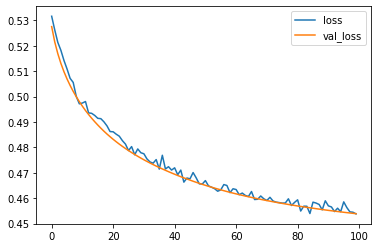

In [101]:
metric_seq[["loss","val_loss"]].plot();

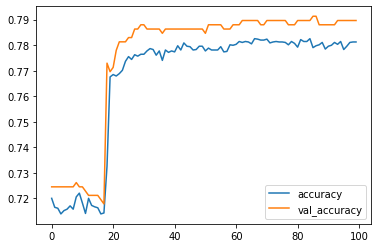

In [102]:
metric_seq[["accuracy","val_accuracy"]].plot();

nilai akurasi masih sedikit overfit

Evaluasi model functional dengan melihat perbandingan metric accuracy dan loss pada data train-val

In [103]:
metric_fun = pd.DataFrame(history_fun.history)

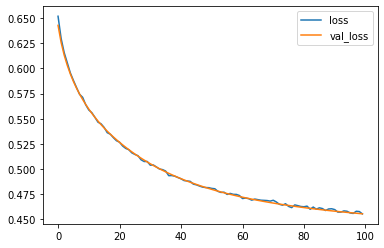

In [104]:
metric_fun[["loss","val_loss"]].plot()

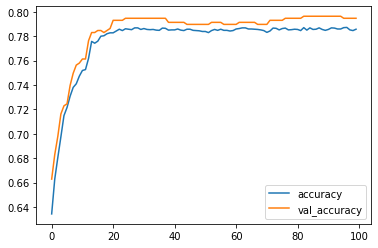

In [105]:
metric_fun[["accuracy","val_accuracy"]].plot()

nilai loss dan akurasi sudah baik

Didapatkan hasil yang hampir sama dari model sequential maupun functional walaupun model sequential sedikit overfit

In [117]:
y_pred = model_fun.predict(test_dataset)
y_pred_label = np.where(y_pred > 0.5,1,0)

In [118]:
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       747
           1       0.68      0.54      0.60       310

    accuracy                           0.79      1057
   macro avg       0.75      0.72      0.73      1057
weighted avg       0.78      0.79      0.78      1057



Didapatkan peningkatan recall dibandingkan tanpa resampling rejection, dengan nilai akurasi yang sama

# Model Saving

Save pipeline preprocessing

In [126]:
# with open("preproc.pkl", "wb") as f:
#   pickle.dump(preprocessor, f)

Save pipeline model

In [127]:
# model_fun.save("model_nn.h5")

# Model Inference

In [119]:
inf_model = inf[["tenure", "InternetService", "OnlineSecurity", "TechSupport", "Contract"]]
inf_label = inf[["Churn"]]
inf_label.reset_index(drop=True,inplace=True)

In [120]:
inf_num = inf_model["tenure"]
inf_num.reset_index(drop=True, inplace=True)

In [121]:
inf_ohe = inf_model[["InternetService", "OnlineSecurity", "TechSupport"]]
inf_ord = inf_model[["Contract"]]

In [122]:
inf_ohe_cod = ohe.transform(inf_ohe).toarray()
inf_ord_cod = ord_coder.transform(inf_ord)

inf_ohe_cod_df = pd.DataFrame(inf_ohe_cod)
inf_ord_cod_df = pd.DataFrame(inf_ord_cod, columns=["Contract"])

In [123]:
inf_final = pd.concat([inf_num,inf_ohe_cod_df,inf_ord_cod_df], axis=1)
inf_final

,tenure,0,1,2,3,4,5,6,7,8,Contract
0,22,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,28,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,31,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,17,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,42,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
7,26,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,71,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
9,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [124]:
inf_pred = model_seq.predict(inf_final)
inf_pred_label = np.where(inf_pred>0.5,1,0)
inf_pred_label_df = pd.DataFrame(inf_pred_label, columns=["Churn Prediction"])

In [125]:
inf_df = pd.concat([inf_final,inf_label,inf_pred_label_df], axis=1)
inf_df

,tenure,0,1,2,3,4,5,6,7,8,Contract,Churn,Churn Prediction
0,22,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
1,28,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0
2,31,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
3,17,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
4,55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0
5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6,42,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,0
7,26,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
8,71,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0,0
9,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0


Walaupun nilai recall telah meningkat, model masih belum begitu mampu mendeteksi label 1 pada target

# Conclusions

- Akurasi yang didapatkan adalah 0.79
- Karena data imbalance, maka dilakukan rejection resampling untuk mendapatkan data yang lebih balance
- Didapatkna nilai recall yang cukup meningkat sebesar 0.54
- Nilai recall dijadikan acuan karena model lebih difokuskan untuk menentukan pelanggan yang akan pergi. Sehingga false negativenya (pelanggan pergi yang diprediksi stay) memiliki kerugian yang lebih besar dari false positivenya (pelanggan yang stay diprediksi pergi)
- Hyperparameter terbaik
  - learning rate = 0.001
  - batch size: 32
  - Optimizer: adagrad
  - Hidden layer: 1
  - Jumlah neuron: 11
  - fungsi aktivasi: relu
  - loss function: binary crossentropy
  - epoch: 100